# Exercise: 
Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is `grocery_db`

In [3]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

import env

In [4]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/grocery_db'

In [5]:
query = '''
select *
from grocery_customers'''

In [6]:
df = pd.read_sql(query, url)

In [7]:
df

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204
436,436,1,3,39228,1431,764,4510,93,2346
437,437,2,3,14531,15488,30243,437,14841,1867
438,438,1,3,10290,1981,2232,1038,168,2125


# Questions about the data: 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customer_id       440 non-null    int64
 1   Channel           440 non-null    int64
 2   Region            440 non-null    int64
 3   Fresh             440 non-null    int64
 4   Milk              440 non-null    int64
 5   Grocery           440 non-null    int64
 6   Frozen            440 non-null    int64
 7   Detergents_Paper  440 non-null    int64
 8   Delicassen        440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


In [9]:
region_count = df.groupby('Region')[['customer_id','Grocery']].nunique()

In [10]:
region_count

,customer_id,Grocery
Region,,
1,77,76
2,47,46
3,316,312


# Cluster: 

In [11]:
# look at three features: 
grocery_milk_fresh = df[['Grocery','Milk','Fresh']]

In [12]:
# scale the data: 
scaler = MinMaxScaler()

In [13]:
#fit the scaler:
scaler.fit(grocery_milk_fresh)

MinMaxScaler()

In [14]:
# use the scaler 
grocery_milk_fresh = scaler.transform(grocery_milk_fresh)

In [15]:
grocery_milk_fresh

array([[0.08146416, 0.13072723, 0.11294004],
       [0.10309667, 0.13282409, 0.06289903],
       [0.08278992, 0.11918086, 0.05662161],
       ...,
       [0.32594285, 0.21013575, 0.1295431 ],
       [0.02402535, 0.02622442, 0.091727  ],
       [0.02702178, 0.02237109, 0.02482434]])

In [16]:
columns = ['Grocery','Milk','Fresh']
scaled_columns = ["Scaled_" + column for column in columns]

In [17]:
scaled_df = pd.DataFrame(grocery_milk_fresh, columns=scaled_columns)

In [18]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Scaled_Grocery  440 non-null    float64
 1   Scaled_Milk     440 non-null    float64
 2   Scaled_Fresh    440 non-null    float64
dtypes: float64(3)
memory usage: 10.4 KB


In [19]:
df = df.merge(scaled_df, on = df.customer_id)

In [20]:
df = df.drop(columns=['key_0'])

In [21]:
# Make the object
dbsc = DBSCAN(eps = .10, min_samples = 20)

# Fit the object
dbsc.fit(grocery_milk_fresh)


DBSCAN(eps=0.1, min_samples=20)

In [22]:
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    409
-1     31
Name: labels, dtype: int64

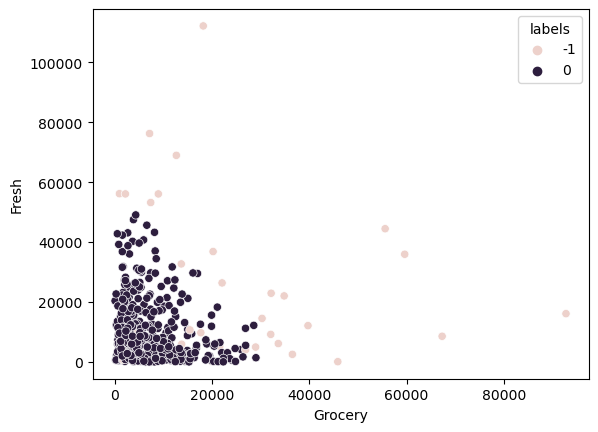

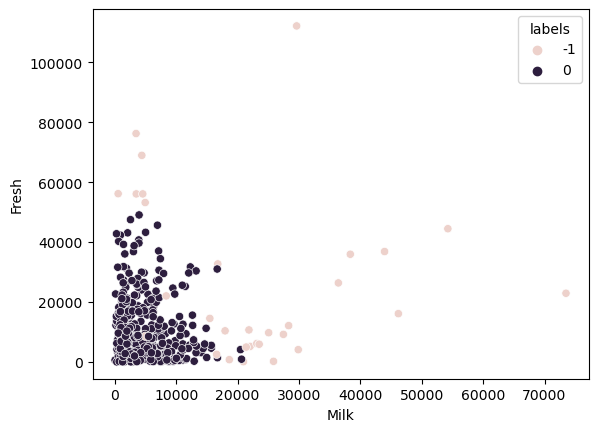

In [23]:
sns.scatterplot(x=df.Grocery, y=df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(x=df.Milk, y=df.Fresh, hue=df.labels)
plt.show()


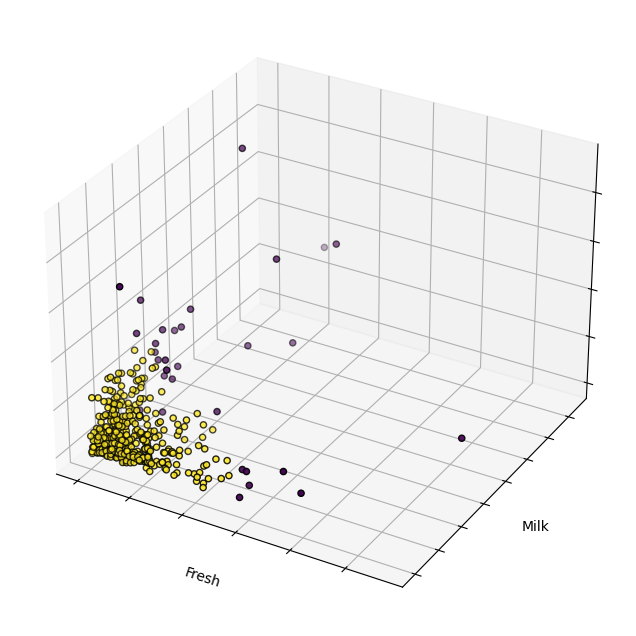

In [24]:
from mpl_toolkits.mplot3d import Axes3D

    
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

# plot the points
ax.scatter(df.Fresh, df.Milk, df.Grocery,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')

plt.show()

Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [25]:
url = url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/zillow'

In [26]:
sql_query = '''
SELECT 
    id,
    transactiondate,
    bathroomcnt,
    bedroomcnt,
    calculatedfinishedsquarefeet,
    fips,
    taxvaluedollarcnt,
    propertylandusetypeid,
    propertylandusedesc,
    yearbuilt
FROM 
    predictions_2017
LEFT JOIN properties_2017
    USING (id)
LEFT JOIN propertylandusetype
    USING (propertylandusetypeid)
WHERE propertylandusetypeid = 261
and transactiondate LIKE '2017%%'
and propertylandusedesc='Single Family Residential'

'''

In [27]:
df = pd.read_sql(sql_query, url)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56079 entries, 0 to 56078
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            56079 non-null  int64  
 1   transactiondate               56079 non-null  object 
 2   bathroomcnt                   56079 non-null  float64
 3   bedroomcnt                    56079 non-null  float64
 4   calculatedfinishedsquarefeet  55848 non-null  float64
 5   fips                          56079 non-null  float64
 6   taxvaluedollarcnt             56071 non-null  float64
 7   propertylandusetypeid         56079 non-null  float64
 8   propertylandusedesc           56079 non-null  object 
 9   yearbuilt                     55830 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.3+ MB


In [29]:
bedrooms_squarefeet = df[['bedroomcnt','calculatedfinishedsquarefeet']]
bedrooms_squarefeet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56079 entries, 0 to 56078
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    56079 non-null  float64
 1   calculatedfinishedsquarefeet  55848 non-null  float64
dtypes: float64(2)
memory usage: 876.4 KB


In [35]:
bedrooms_squarefeet = bedrooms_squarefeet.dropna()

In [36]:
bedrooms_squarefeet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55848 entries, 0 to 56078
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    55848 non-null  float64
 1   calculatedfinishedsquarefeet  55848 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


In [ ]:
# scale the data: 
scaler = MinMaxScaler()

In [ ]:
# fit the scaler
scaler.fit(bedrooms_squarefeet)

In [ ]:
# use the scaler
bedrooms_squarefeet = scaler. transform(bedrooms_squarefeet)

In [ ]:
# make the object
dbsc = DBSCAN(eps = .10, min_samples = 100)
#fit the object
dbsc.fit(bedrooms_squarefeet)